In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mydata=pd.read_excel('D:\Seminar Matematika\Data Penumpang Kereta Api.xlsx')
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Waktu                        48 non-null     datetime64[ns]
 1   Jumlah Penumpang Kereta Api  48 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 896.0 bytes


,Waktu,Jumlah Penumpang Kereta Api
0,2016-01-01,28358
1,2016-02-01,26510
2,2016-03-01,28617
3,2016-04-01,28435
4,2016-05-01,30703


In [3]:
#Menentukan himpunan semesta pembicaraan (U)
U=[min(mydata['Jumlah Penumpang Kereta Api']),max(mydata['Jumlah Penumpang Kereta Api'])]
D1=12
D2=13 #Suka - suka wkwk
U=[U[0]-D1,U[1]+D2]
print(U)

[26498, 37978]


In [4]:
#Menentukan panjang interval (R)
R=U[1]-U[0]
#R=round(R,2) #pembulatan
print(R)

11480


In [5]:
#Menentukan banyaknya interval kelas
n=len(mydata['Jumlah Penumpang Kereta Api'])
K=1+3.3*math.log10(n)
K=round(K) #ini ga tau penting atau engga
print(K)

7


In [6]:
#Menentukan lebar interval
L=R/K
print(L)

1640.0


In [7]:
#Mendefinisikan himpunan fuzzy dan menentukan nilai tengah
I=list()
Interval=list()
m=list()
a=U[0]
for i in range(K):
    I.append('A'+str(i+1))
    Interval.append((a,a+L))
    m.append((a+a+L)/2)
    a=a+L
data_tabel={'Himpunan Fuzzy' : I,
              'Interval' : Interval,
              'Nilai Tengah' : m}
df1=pd.DataFrame(data_tabel)
df1.head(K)

,Himpunan Fuzzy,Interval,Nilai Tengah
0,A1,"(26498, 28138.0)",27318.0
1,A2,"(28138.0, 29778.0)",28958.0
2,A3,"(29778.0, 31418.0)",30598.0
3,A4,"(31418.0, 33058.0)",32238.0
4,A5,"(33058.0, 34698.0)",33878.0
5,A6,"(34698.0, 36338.0)",35518.0
6,A7,"(36338.0, 37978.0)",37158.0


In [8]:
#Membuat tabel Fuzzy Logical Relationship (FLR)
fuzzyfikasi=list()
relasi=list()
r=0
for i in range(n):
    for j in range(K):
        if mydata['Jumlah Penumpang Kereta Api'][i]>=df1['Interval'][j][0] and mydata['Jumlah Penumpang Kereta Api'][i]<=df1['Interval'][j][1]:
            fuzzyfikasi.append(df1['Himpunan Fuzzy'][j])
            if r==0:
                relasi.append('-')
            else:
                relasi.append(r+'->'+df1['Himpunan Fuzzy'][j])
            r=df1['Himpunan Fuzzy'][j]
            break
        else:
            continue
data_aktual={'Waktu' : mydata['Waktu'],
             'Jumlah Penumpang' : mydata['Jumlah Penumpang Kereta Api'],
             'Fuzzyfikasi' : fuzzyfikasi,
             'Relasi' : relasi}
df2=pd.DataFrame(data_aktual)
df2.head(8)

,Waktu,Jumlah Penumpang,Fuzzyfikasi,Relasi
0,2016-01-01,28358,A2,-
1,2016-02-01,26510,A1,A2->A1
2,2016-03-01,28617,A2,A1->A2
3,2016-04-01,28435,A2,A2->A2
4,2016-05-01,30703,A3,A2->A3
5,2016-06-01,29159,A2,A3->A2
6,2016-07-01,28831,A2,A2->A2
7,2016-08-01,29588,A2,A2->A2


In [9]:
df2.tail(8)

,Waktu,Jumlah Penumpang,Fuzzyfikasi,Relasi
40,2019-05-01,35102,A6,A6->A6
41,2019-06-01,35090,A6,A6->A6
42,2019-07-01,37906,A7,A6->A7
43,2019-08-01,35189,A6,A7->A6
44,2019-09-01,35221,A6,A6->A6
45,2019-10-01,36448,A7,A6->A7
46,2019-11-01,35877,A6,A7->A6
47,2019-12-01,37463,A7,A6->A7


In [10]:
#Membuat Fuzzy Logic Relationship Group
grup=list()
FLR=list()
for i in range(len(I)):
    grup.append('Grup '+str(i+1))
    FLR1=list()
    for j in range(1,n):
        if relasi[j][1:3]==str(i+1):
            FLR1.append(fuzzyfikasi[j])
        elif relasi[j][1:3]==str(i+1)+'-':
            FLR1.append(fuzzyfikasi[j])
        else:
            pass
    FLR2='A'+str(i+1)+'->'
    for ii in range(len(FLR1)):
        FLR2+=FLR1[ii]+','
    FLR2=FLR2[:-1]
    FLR.append(FLR2)
        
data_FLRG={'Grup' : grup,
           'Himpunan Fuzzy' : I,
           'FLR' : FLR}
df3=pd.DataFrame(data_FLRG)
df3.head(K)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"A1->A2,A4"
1,Grup 2,A2,"A2->A1,A2,A3,A2,A2,A2,A3,A4"
2,Grup 3,A3,"A3->A2,A2,A1,A5,A6"
3,Grup 4,A4,"A4->A3,A4,A5,A6,A7,A6"
4,Grup 5,A5,"A5->A3,A5,A4,A7,A6"
5,Grup 6,A6,"A6->A5,A3,A6,A6,A4,A5,A6,A7,A4,A6,A6,A6,A7,A6,..."
6,Grup 7,A7,"A7->A6,A6,A6,A6,A6"


In [11]:
#FLRG Pengulangan
#Catatan : Untuk run code ini, sebaiknya run yang sebelumnya terlebih dahulu agar terhindar dari error
for i in range(len(df3)):
    bb=df3['FLR'][i]
    if i>=0 and i<=8:
        bb=bb[4:]
    elif i>=9:
        bb=bb[5:]
    bb=bb.split(',')
    cc=list()
    for ii in range(len(bb)):
        if bb[ii] in cc:
            pass
        else:
            cc.append(bb[ii])
    dd=list()
    for j in range(len(cc)):
        k=0
        for jj in range(len(bb)):
            if cc[j]==bb[jj]:
                k+=1
            else:
                pass
        dd.append(str(k)+'('+cc[j]+')')
    df3['FLR'][i]=dd
df3.head(K)

,Grup,Himpunan Fuzzy,FLR
0,Grup 1,A1,"[1(A2), 1(A4)]"
1,Grup 2,A2,"[1(A1), 4(A2), 2(A3), 1(A4)]"
2,Grup 3,A3,"[2(A2), 1(A1), 1(A5), 1(A6)]"
3,Grup 4,A4,"[1(A3), 1(A4), 1(A5), 2(A6), 1(A7)]"
4,Grup 5,A5,"[1(A3), 1(A5), 1(A4), 1(A7), 1(A6)]"
5,Grup 6,A6,"[2(A5), 1(A3), 7(A6), 2(A4), 4(A7)]"
6,Grup 7,A7,[5(A6)]


In [12]:
#Pembuatan DataFrame Pembobotan Fuzzy
A=list()
o=list()
for i in range(K):
    A.append('A'+str(i+1))
    o.append(0)
df4={'X(t-1)' : A}
for i in range(K):
    df4[A[i]]=o
df4=pd.DataFrame(df4)
df4.head(K)  

,X(t-1),A1,A2,A3,A4,A5,A6,A7
0,A1,0,0,0,0,0,0,0
1,A2,0,0,0,0,0,0,0
2,A3,0,0,0,0,0,0,0
3,A4,0,0,0,0,0,0,0
4,A5,0,0,0,0,0,0,0
5,A6,0,0,0,0,0,0,0
6,A7,0,0,0,0,0,0,0


In [13]:
#Input Bobot Ke Dalam Matriks Pembobobotan Fuzzy
for i in range(K):
    x=df3['FLR'][i]
    for j in range(len(x)):
        y=x[j].split('(')
        y2=y[1]
        df4[y2[:-1]][i]=int(y[0])
for i in range(K):
    df4[A[i]]=df4[A[i]].astype(float)
df4.info()
df4.head(K)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(t-1)  7 non-null      object 
 1   A1      7 non-null      float64
 2   A2      7 non-null      float64
 3   A3      7 non-null      float64
 4   A4      7 non-null      float64
 5   A5      7 non-null      float64
 6   A6      7 non-null      float64
 7   A7      7 non-null      float64
dtypes: float64(7), object(1)
memory usage: 576.0+ bytes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,X(t-1),A1,A2,A3,A4,A5,A6,A7
0,A1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,A2,1.0,4.0,2.0,1.0,0.0,0.0,0.0
2,A3,1.0,2.0,0.0,0.0,1.0,1.0,0.0
3,A4,0.0,0.0,1.0,1.0,1.0,2.0,1.0
4,A5,0.0,0.0,1.0,1.0,1.0,1.0,1.0
5,A6,0.0,0.0,1.0,2.0,2.0,7.0,4.0
6,A7,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [14]:
#Pembobotan Normalisasi
Bobot_Norm=df4.drop(['X(t-1)'],axis=1)
Bobot_Norm=Bobot_Norm.values
for i in range(len(Bobot_Norm)):
    jum=sum(Bobot_Norm[i])
    for j in range(len(Bobot_Norm)):
        ele=float(Bobot_Norm[i][j])
        Bobot_Norm[i][j]=ele/jum
print(Bobot_Norm)

[[0.         0.5        0.         0.5        0.         0.
  0.        ]
 [0.125      0.5        0.25       0.125      0.         0.
  0.        ]
 [0.2        0.4        0.         0.         0.2        0.2
  0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.33333333
  0.16666667]
 [0.         0.         0.2        0.2        0.2        0.2
  0.2       ]
 [0.         0.         0.0625     0.125      0.125      0.4375
  0.25      ]
 [0.         0.         0.         0.         0.         1.
  0.        ]]


In [15]:
#Perkalian Elemen Bobot Normalisasi dengan Median (m1 X Bobot A1)
M=list()
for i in range(len(Bobot_Norm)):
    Mn=list()
    for j in range(len(Bobot_Norm)):
        Mnn=Bobot_Norm[i][j]*df1['Nilai Tengah'][j]
        Mn.append(Mnn)
    M.append(Mn)
print(M)

[[0.0, 14479.0, 0.0, 16119.0, 0.0, 0.0, 0.0], [3414.75, 14479.0, 7649.5, 4029.75, 0.0, 0.0, 0.0], [5463.6, 11583.2, 0.0, 0.0, 6775.6, 7103.6, 0.0], [0.0, 0.0, 5099.666666666666, 5373.0, 5646.333333333333, 11839.333333333332, 6193.0], [0.0, 0.0, 6119.6, 6447.6, 6775.6, 7103.6, 7431.6], [0.0, 0.0, 1912.375, 4029.75, 4234.75, 15539.125, 9289.5], [0.0, 0.0, 0.0, 0.0, 0.0, 35518.0, 0.0]]


In [16]:
#Pembuatan Data Frame Peramalan
t=list()
for i in range(len(mydata)):
    t.append(i+1)
df6={'t' : t,
     'Waktu' : mydata['Waktu'],
     'Jumlah Penumpang' : mydata['Jumlah Penumpang Kereta Api']}
Ft=list()
Ft.append(0)
for i in range(1,len(mydata)):
    Wn=df2['Fuzzyfikasi'][i-1]
    Wn=int(Wn[1:])
    jum_norm=sum(M[Wn-1])
    Ft.append(jum_norm)
df6['Peramalan F(t)']=Ft
df6=pd.DataFrame(df6)
df6.info()
df6.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t                 48 non-null     int64         
 1   Waktu             48 non-null     datetime64[ns]
 2   Jumlah Penumpang  48 non-null     int64         
 3   Peramalan F(t)    48 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 KB


,t,Waktu,Jumlah Penumpang,Peramalan F(t)
0,1,2016-01-01,28358,0.0
1,2,2016-02-01,26510,29573.0
2,3,2016-03-01,28617,30598.0
3,4,2016-04-01,28435,29573.0
4,5,2016-05-01,30703,29573.0
5,6,2016-06-01,29159,30926.0
6,7,2016-07-01,28831,29573.0
7,8,2016-08-01,29588,29573.0


In [17]:
df6.tail(8)

,t,Waktu,Jumlah Penumpang,Peramalan F(t)
40,41,2019-05-01,35102,35005.5
41,42,2019-06-01,35090,35005.5
42,43,2019-07-01,37906,35005.5
43,44,2019-08-01,35189,35518.0
44,45,2019-09-01,35221,35005.5
45,46,2019-10-01,36448,35005.5
46,47,2019-11-01,35877,35518.0
47,48,2019-12-01,37463,35005.5


In [18]:
#Menghitung Nilai Error (|e|)
df7={'t' : df6['t'],
     'Waktu' : df6['Waktu'],
     'Jumlah Penumpang' : df6['Jumlah Penumpang'],
     'Peramalan F(t)' : df6['Peramalan F(t)']}
e=list()
e.append(0)
for i in range(1,len(df6)):
    ee=df6['Jumlah Penumpang'][i]-df6['Peramalan F(t)'][i]
    ee=math.sqrt(ee**2)
    e.append(ee)
df7['Error']=e
df7=pd.DataFrame(df7)
df7.info()
df7.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t                 48 non-null     int64         
 1   Waktu             48 non-null     datetime64[ns]
 2   Jumlah Penumpang  48 non-null     int64         
 3   Peramalan F(t)    48 non-null     float64       
 4   Error             48 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.0 KB


,t,Waktu,Jumlah Penumpang,Peramalan F(t),Error
0,1,2016-01-01,28358,0.0,0.0
1,2,2016-02-01,26510,29573.0,3063.0
2,3,2016-03-01,28617,30598.0,1981.0
3,4,2016-04-01,28435,29573.0,1138.0
4,5,2016-05-01,30703,29573.0,1130.0
5,6,2016-06-01,29159,30926.0,1767.0
6,7,2016-07-01,28831,29573.0,742.0
7,8,2016-08-01,29588,29573.0,15.0


In [19]:
df7.tail(8)

,t,Waktu,Jumlah Penumpang,Peramalan F(t),Error
40,41,2019-05-01,35102,35005.5,96.5
41,42,2019-06-01,35090,35005.5,84.5
42,43,2019-07-01,37906,35005.5,2900.5
43,44,2019-08-01,35189,35518.0,329.0
44,45,2019-09-01,35221,35005.5,215.5
45,46,2019-10-01,36448,35005.5,1442.5
46,47,2019-11-01,35877,35518.0,359.0
47,48,2019-12-01,37463,35005.5,2457.5


In [20]:
#Menentukan MAE atau MSE
N=len(e)
MAE=sum(e)/N
e_kuadrat=list()
for i in range(N):
    e_kuadrat.append(e[i]**2)
MSE=sum(e_kuadrat)/N
RMSE=math.sqrt(MSE)
print('Nilai MAE adalah ', MAE)
print('Nilai MSE adalah ', MSE)
print('Nilai RMSE adalah ', RMSE)

Nilai MAE adalah  1538.8541666666667
Nilai MSE adalah  3946924.4722222215
Nilai RMSE adalah  1986.6868077838092


<function matplotlib.pyplot.show(*args, **kw)>

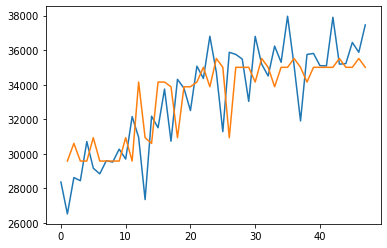

In [21]:
plt.plot(df7['Jumlah Penumpang'])
plt.plot(df7['Peramalan F(t)'][1:])
plt.show